**TRABAJO FINAL CURSO DATA SCIENCE**

**Profesor:** Ignacio Russo Locati

**Equipo de Trabajo:** Juan Gabriel Garcia Ojeda, Juan Ignacio Carrere

**PRESENTACION DEL PROBLEMA**

**I) ABSTRACTO**

Las instituciones financieras han visto incrementada la demanda de créditos a lo largo de las últimas décadas, siendo este aumento explicado en parte por el surgimiento de nuevos modelos de negocios dentro del sistema financiero comúnmente denominados finanzas descentralizadas. Esta situación, en conjunto con las diversas regulaciones que exigen los países con relación a la necesidad de llevar a cabo algún tipo de evaluación previa que determine el riesgo que implica el otorgamiento del crédito a determinado individuo o empresa, han llevado a dichas instituciones a desarrollar diversas técnicas que sirvan para estimar la probabilidad de default de la manera más eficiente y precisa posible. En este sentido, los modelos de puntaje crediticio han sido los más utilizados.

El surgimiento de FinTechs como Peer to peer lending (en adelante P2P) ha puesto en mayor relieve la necesidad de mejorar las técnicas utilizadas en la estimación de los modelos de puntaje debido a las características propias de estas plataformas, ya que suponen, entre otras cosas, un riesgo sistémico mayor. Además, a medida que crece el volumen de operaciones a través de estas plataformas, una estimación inadecuada del riesgo crediticio puede implicar una amenaza para la estabilidad financiera.

En los últimos años se ha visto un avance importante en el uso de técnicas de Machine Learning para el desarrollo de modelos de puntaje crediticio como alternativa al uso de modelos econométricos clásicos como la Regresión Lineal y la Regresión Logística, entre otros. En ciertos contextos, los algoritmos de clasificación desarrollados a partir de Inteligencia Artificial han probado tener un mejor desempeño.

En este trabajo se busca llevar a cabo un análisis comparativo de los principales algoritmos de clasificación utilizados en la actualidad aplicados a la estimación de modelos de puntaje crediticio para la evaluación del riesgo de empresas PYME que acceden a financiamiento mediante instituciones no tradicionales, como la FinTech P2P. Se propone llevar a cabo dicho análisis a través del uso de diversas métricas que permitan obtener conclusiones e identificar ventajas y desventajas en cada uno de los algoritmos.

**II) PREGUNTAS Y OBJETIVOS DEL PROYECTO:**

- ) **Pregunta general**: ¿Cuál es el algoritmo de clasificación de Machine Learning más adecuado para la estimación de modelos de puntaje crediticio aplicado a PyMES que participan en plataformas P2P?

- ) **Pregunta específica 1**: ¿Puede cambiar la decisión del algoritmo óptimo obtenido a partir de la métrica “exactitud” al incorporar nuevas métricas?

- ) **Pregunta específica 2**: ¿Es mejor el desempeño predictivo del algoritmo óptimo al del modelo Logit?

A partir de las preguntas del proyecto, surge el objetivo del mismo:

- ) **Objetivo general**: Establecer un procedimiento a seguir en el proceso de estimación y evaluación de modelos de puntaje crediticio para PyMES que participen en plataformas P2P.


# Sección 1 - DATA ACQUISITION

## Importación de librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    
import pandas as pd                   
import scipy as sp    
import statistics
from scipy.stats import zscore

# Gráficos
# ==============================================================================
import matplotlib as mpl              
import matplotlib.pyplot as plt       
import seaborn as sns                 


# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

# Métricas
# ==============================================================================
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## DataSet

In [2]:
df = pd.read_csv('smaller_dataset1.csv')
df.head(5)

,Unnamed: 0,X1,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,...,ratio019,ratio027,ratio029,ratio030,DIO,DPO,DSO,turnover,status,nace
0,1,14,180.39,0.00,1.01,1.06,1.06,2.25,-48.31,0.00,...,-0.02,277.13,0.00,0.00,1,283,0,3437,1,4941
1,2,18,3.73,0.21,1.27,1.41,1.35,1.89,13.57,0.11,...,0.07,21.40,0.10,0.10,7,61,75,1991,1,1330
2,3,21,0.19,0.00,6.18,3.28,3.28,1.79,-17.72,-0.28,...,-0.06,-16.50,-0.05,-0.05,0,5,27,1739,1,4646
3,4,25,-1.49,0.00,0.33,0.10,0.10,-2.73,-53.41,-0.79,...,-0.02,-42.31,-0.66,-0.74,0,0,0,1499,1,9313
4,5,31,-1.21,0.00,0.17,0.14,0.14,-28.95,-58.08,-1.02,...,-0.02,-57.31,-0.23,-0.23,0,444,0,1244,1,4759


Las columnas de datos son las siguientes:

* ratio001 = (Total assets - Shareholders Funds)/Shareholders Funds): Capital ajeno en relacion al propio ó cociente de participacion de tercero.

* ratio002 = (Long term debt + Loans)/Shareholders Funds): Obligaciones de Largo Plazo (pasivo no corriente) en relación al capital propio. 

* ratio003 = (Total assets/Total liabilties): Ratio de solvencia. En general es solvente si es > 1. 

* ratio004 = (Current assets/Current liabilties): Ratio de liquidez. Activos corrientes en relacion a los pasivos corrientes. 

* ratio005 = ((Current assets - Current assets: stocks)/Current liabilties)): Comunmente llamado "Prueba ácida". Ratio de liquidez con los activos más liquidos

* ratio006 = ((Shareholders Funds + Non current liabilities)/Fixed assets)): Indica la proporcion en la que los activos de Largo Plazo son financiados por fuentes de igual o mayor plazo

* ratio008 = (EBIT/interest paid) (EBIT = GANANCIAS ANTES DE INTERESES E IMPUESTOS): Capacidad para antender los intereses que paga la empresa. (Lo deseable y 'normal' es que el ratio > 1)

* ratio011 = (Profit (loss) before tax + Interest paid)/Total assets)): Rendimiento del activo de la empresa sin considerar el pago de impuestos

* ratio012 = ((P/L) after tax/Shareholders Funds): Ratio de rentabilidad de los accionistas despues de impuestos

* ratio013 = (Gross profit/Operating revenues): Este ratio se enfoca en destacar la aparicion de ganancias o perdidas asociadas a actividades no habituales de la empresa. (Ganancia Bruta = EBIT +- resultados extraordinario)

* ratio017 = (Operating revenues/Total assets): Pesos de ganancia por actividad operativa por peso de financiamiento total de la empresa.

* ratio018 = (Sales/Total assets): Pesos de ingreso por ventas por peso de financiamiento total

* ratio019 = (Interest paid/(Profit before taxes + Interest paid)): Peso de la carga financiera sobre el resultado antes de impuestos. 

* ratio027 = (EBITDA/interest paid):

* ratio029 = (EBITDA/Operating revenues): Ganancia antes de 

* ratio030 = (EBITDA/Sales): Ganancia por venta.

* DPO = (Trade Payables/Operating revenues): Acreedores/Resultado operativo: Una forma de ver la solvencia, por cada peso de ganancia cuantos pesos debo.

* DSO = (Trade Receivables/Operating revenues): Cuentas por cobrar/Resultado operativo: Misma interpretación anterior, pero en este caso es cuantos pesos me deben

* DIO = (Inventories/Operating revenues): Valor del inventario en relación al resultado operativo

* NACE = (Industry classification on NACE code, 4 digits precision): identificación de industria en la que opera la empresa

* Status = 1 for default, 0 for otherwise

# Sección 2 - DATA WRANGLING

In [3]:
#Obtenemos informacion de las columnas de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4514 non-null   int64  
 1   X1          4514 non-null   int64  
 2   ratio001    4514 non-null   float64
 3   ratio002    4514 non-null   float64
 4   ratio003    4514 non-null   float64
 5   ratio004    4514 non-null   float64
 6   ratio005    4514 non-null   float64
 7   ratio006    4514 non-null   float64
 8   ratio008    4514 non-null   float64
 9   ratio011    4514 non-null   float64
 10  ratio012    4514 non-null   float64
 11  ratio017    4514 non-null   float64
 12  ratio018    4514 non-null   float64
 13  ratio019    4514 non-null   float64
 14  ratio027    4514 non-null   float64
 15  ratio029    4514 non-null   float64
 16  ratio030    4514 non-null   float64
 17  DIO         4514 non-null   int64  
 18  DPO         4514 non-null   int64  
 19  DSO         4514 non-null  

Notamos que la variable 'Unnamed' es ordinal y no cumple ningun otro propósito mas que numerar las filas, por lo que es conveniente cambiarle el nombre a 'Empresas' y que cumpla la función de índice. Además, las variables 'turnover'y 'X1' no presenta explicacion por parte de la fuente de la base de datos y la variable 'nace' es un numero identificador de industria, por lo que se decide eliminar estas variables de la base.

In [4]:
df = df.rename(columns={'Unnamed: 0': "Empresas"}) #Renombro columna 0
df.set_index('Empresas',inplace=True) 
df = df.drop('turnover', 1) #elimino columna turnover 
df = df.drop('X1', 1) #elimino columna X1
df = df.drop('nace', 1) #elimino columna nace

In [5]:
#Buscamos valores nulos
df.isnull().sum()

ratio001    0
ratio002    0
ratio003    0
ratio004    0
ratio005    0
ratio006    0
ratio008    0
ratio011    0
ratio012    0
ratio017    0
ratio018    0
ratio019    0
ratio027    0
ratio029    0
ratio030    0
DIO         0
DPO         0
DSO         0
status      0
dtype: int64

No se observa la presencia de valores nulos en el DataSet

Es importante lograr diferenciar entre variables continuas y dicotómicas binarias. Para esto, se lleva a cabo un recuento de cantidad de valores únicos de cada columna de la base de datos. Para las variables dummy este recuento deberia ser de 2 (0 y 1).

In [6]:
unique_counts = df.nunique()
print("Valores únicos por columna:")
print(unique_counts)

Valores únicos por columna:
ratio001    2098
ratio002     874
ratio003     400
ratio004     513
ratio005     449
ratio006    1521
ratio008    2775
ratio011     142
ratio012     383
ratio017     487
ratio018     495
ratio019     334
ratio027    3068
ratio029     186
ratio030     198
DIO          522
DPO          406
DSO          471
status         2
dtype: int64


Podemos identificar rápidamente que la columna Status corresponde a valores binarios mientras que el resto de variables son continuas.

Resulta interesante analizar brevemente simples estadísticas de aquellas variables continuas 

In [7]:
var_cont = df.loc[:, unique_counts > 2]
var_cont.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ratio001,4514.0,8.89,19.15,-64.43,1.30,3.77,9.68,206.55
ratio002,4514.0,1.26,3.33,-9.58,0.00,0.09,1.17,33.38
ratio003,4514.0,1.44,0.76,0.17,1.07,1.20,1.52,8.27
ratio004,4514.0,1.54,1.20,0.01,0.97,1.22,1.72,13.71
ratio005,4514.0,1.19,1.02,0.00,0.61,0.99,1.41,10.88
ratio006,4514.0,7.73,23.28,-33.14,0.94,1.72,4.89,297.02
ratio008,4514.0,23.07,70.27,-285.86,1.24,3.59,16.32,566.96
ratio011,4514.0,0.03,0.15,-1.28,0.01,0.03,0.07,0.49
ratio012,4514.0,-0.07,0.79,-8.54,0.00,0.07,0.21,1.08
ratio017,4514.0,1.37,1.07,0.01,0.68,1.17,1.74,8.42


Teniendo en cuenta que las variables analizadas son ratios financieros, y por lo tanto es esperable que tengan cierta amplitud podemos notar que observando los valores minimos y máximos de cada variable vemos que los siguientes ratios presentan bastante amplitud:

* ratio001
* ratio006
* ratio008
* ratio027
* DIO
* DPO
* DSO

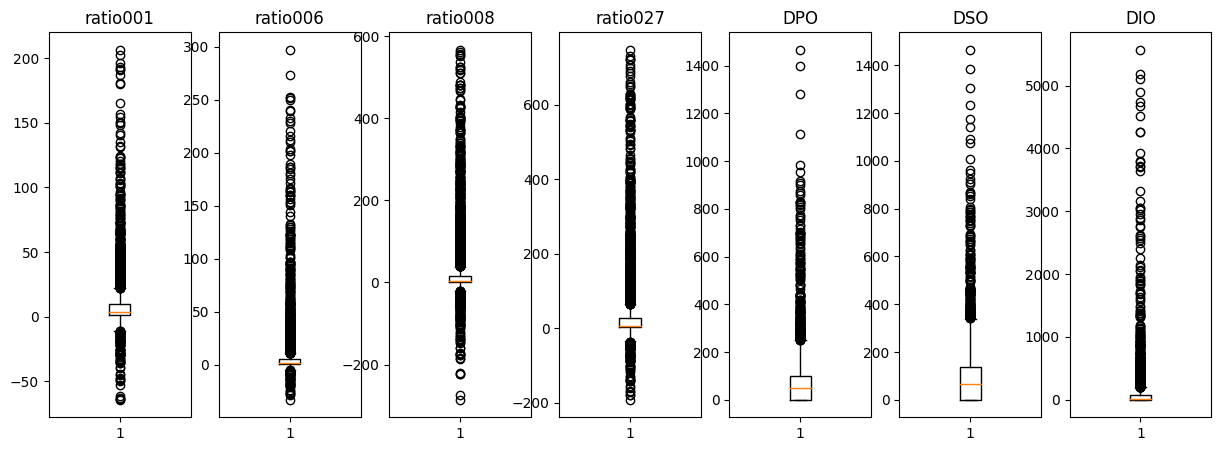

In [8]:
df_num = df.loc[:,['ratio001', 'ratio006', 'ratio008', 'ratio027', 'DPO', 'DSO','DIO']]

#crear una figura con varios subplots
fig, axs = plt.subplots(ncols=len(df_num.columns), figsize=(15,5))

#graficar un boxplot para cada variable
for i, col in enumerate(df_num.columns):
    axs[i].boxplot(df_num[col])
    axs[i].set_title(col)

In [9]:
# Z-score para la detección de outliers
df_zscore = df_num.apply(zscore)
umbral = 3

# Copia del DataFrame original
df_outliers = df.copy()

# Iterar sobre todas las columnas del DataFrame numérico y agregar información sobre outliers
for columna in df_num.columns:
    outliers_index = abs(df_zscore[columna]) > umbral
    df_outliers.loc[outliers_index, columna+'_outlier'] = df_outliers[columna][outliers_index]


<Axes: >

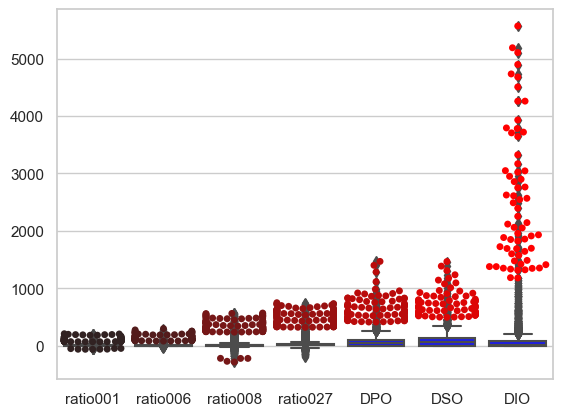

In [10]:
# Graficar boxplots para todas las columnas con outliers en un color diferente
sns.set(style='whitegrid')
sns.boxplot(data=df_num, color='blue')
sns.swarmplot(data=df_outliers.filter(like='_outlier'), color='red')

De los gráficos de boxplot de las variables RatioXXX podemos concluir:

* Del ratio 001 (ACTIVO TOTAL - CAPITAL PROPIO/CAPITAL PROPIO): Es posible que una empresa PyME se vea financiado por capital ajeno por hasta un 200% de su capital propio. Esto significa que la empresa esta altamente apalancada. Por otro lado, que el ratio sea negativo implica que el financiamiento propio es mayor proporcionalmente al financiamiento ajeno. Este ratio depende de la estructura de financiamiento que haya decidio utilizar a empresa

* Del ratio 006 (CAPITAL PROPIO + PASIVOS NO CORRIENTES/ACTIVOS FIJOS): Es posible que una empresa PyME tenga financiamiento de hasta 3 veces de los activos totales con fuentes de igual o mayor plazo (es más, es deseable en ciertos contextos que sea asi). Por otro lado, valores negativos del ratio no son posibles, o por lo menos no es esperable y probablemente sea un error en la carga de datos

* Del ratio 008 (EBIT/INTERESES PAGADOS): Es posible, y probable, que este ratio alcance valores altos ya que una empresa con poca carga de intereses y buen nivel de EBIT implicaria que su EBIT pueda llegar a ser 6 veces la carga de intereses. Los valores negativos implicarian EBIT negativo (resultado antes de impuestos e intereses negativo = pérdida)

* Del ratio 027 (EBITDA/INTERESES PAGADOS): Misma explicación que el ratio 008, solo que al resultado se le restan además las depreciaciones y amortizaciones.

De las conclusiones se decide eliminar los valores negativos del ratio006 y reemplazarlos por el valor 0 (que es el que implicaría un valor neutro en el ratio). Se decide dejar el resto de "outliers" debido a que representaría una pérdida de valiosa información que caracteriza a cada empresa en particular. Además, al ser ratios financieros estos datos son correspondidos con otras variables, por lo que la modificación arbitraria podría llevar a inconsistencias en algunas instancias.

Del análisis de boxplot de las varibales DIO/DPO/DSO

* Las variables DPO (ACREEDORES/GANANCIA OPERATIVA) y DSO (CUENTAS POR COBRAR/GANANCIA OPERATIVA) representan la situación de la empresa en la gestion de pagos y cobros. Al ser Acreedores y Cuentas por cobrar unicamente utilizados en estos dos ratios, si se tratan los valores atípicos no perdería la correlación con otro ratio del resto de la base de datos. Sin embargo, únicamente se tratarán aquellos outliers que superen el valor de 1000, es decir, empresas que deban y/o les deban mas de 10 veces su ganancia operativa lo cual es considerado inusual y puede debarse a un error en la carga de datos. Se analizará la distribución de ambas variables para determinar por que valor de tendencia central es conveniente reemplazarlo.

* La variable DIO (Inventarios/Ganancia Operativa) se dejará con sus outliers, ya que el nivel de inventario de las empresas puede depender de la actividad que realice y cambiar dicho valor puede provocar perdida de valiosa información.

<Figure size 640x480 with 0 Axes>

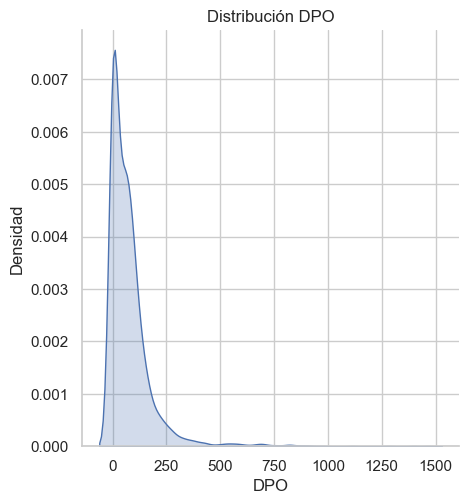

<Figure size 640x480 with 0 Axes>

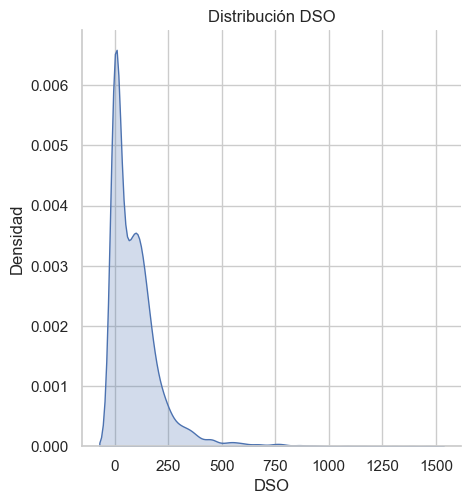

In [11]:
# Analisis de distribucion de variables DPO y DSO
plt.figure()
ax = sns.displot(data=df, x="DPO", kind="kde", fill=True)
ax.set(xlabel='DPO', ylabel='Densidad', title='Distribución DPO')

plt.figure()
ax = sns.displot(data=df, x="DSO", kind="kde", fill=True)
ax.set(xlabel='DSO', ylabel='Densidad', title='Distribución DSO')

Se puede notar lo asimétrica que es la distribución de ambas variables, por lo que lo óptimo será reemplazar los outliers considerados por la mediana de la distribución.

In [12]:
# Eliminar los valores negativos del ratio006 y reemplazarlos por 0
df['ratio006'] = df['ratio006'].apply(lambda x: 0 if x < 0 else x)

<Axes: xlabel='ratio006'>

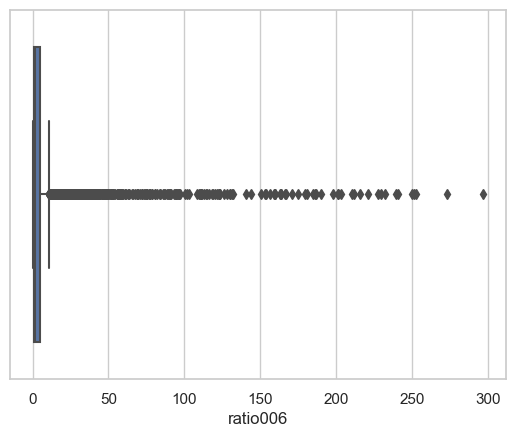

In [13]:
#Vemos como queda el boxplot del ratio006
sns.boxplot(x = 'ratio006', data = df)

In [14]:
# Reemplazar los valores mayores a 1000 de las variables DPO y DSO y reemplazar los valores por la mediana de la distribución

#DPO
mediana = df['DPO'].median()
df.loc[df['DPO'] > 1000, 'DPO'] = mediana

#DSO
mediana2 = df['DSO'].median()
df.loc[df['DSO'] > 1000, 'DSO'] = mediana2

<Axes: xlabel='DPO'>

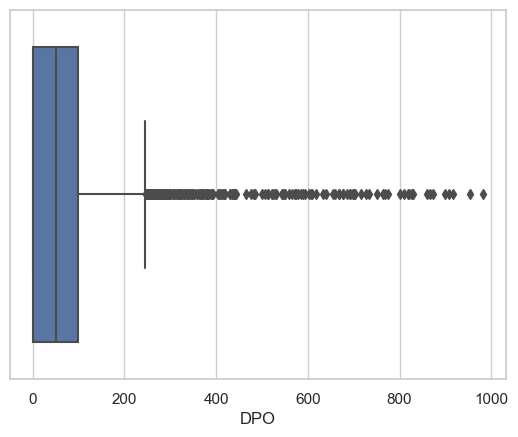

In [15]:
# Boxplot DPO
sns.boxplot(x = 'DPO', data = df)

<Axes: xlabel='DSO'>

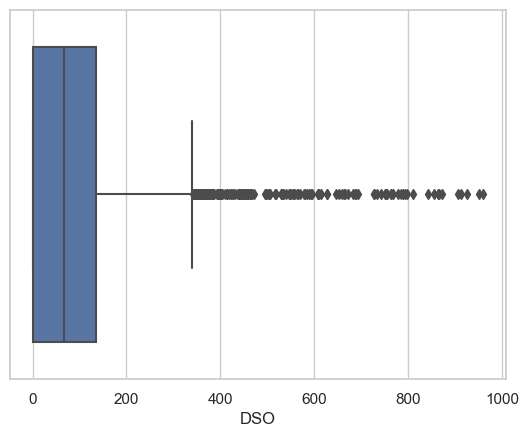

In [16]:
# Boxplot DSO
sns.boxplot(x = 'DSO', data = df)

**CONCLUSIONES**

* El DataSet con el que trabajaremos esta compuesto por 4514 filas y 19 columnas (luego de eliminar 3 columnas sin ninguna utilidad y definir una de ellas como indice). Cada columna indica algun tipo de información financiera 

* No se detectan datos faltantes en la base de datos

* 16 variables son numéricas continuas y solo 1 variable dicotómica (binaria).

* De las variables que mayor amplitud presentan se buscó mediante grafico boxplot la presencia de datos atípicos. Se decidió dejar los valores que forman parte de los extremos de la distribución de cada variable, a excepción del caso de las variables 'DPO' y 'DSO'. La razón para decidir quedarse con los valores considerados atípicos según zscore es que no son considerados "errores" ya que es información valiosa sobre las características de cada empresa.   

* Del ratio006 se eliminaron los valores negativos, ya que observando la conformación del ratio no es posible que surgan valores menores a cero.

* Se reemplazaron los valores mayores a 1000 para los casos de las variables 'DPO' y 'DSO'. 

# Sección 3 - EDA

Comenzamos viendo la proporcion de instancias en default (status = 1) y aquellas en no default (status = 0)

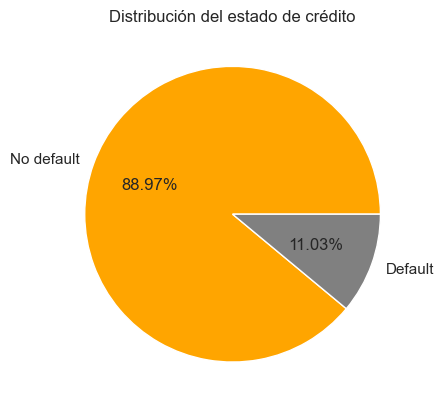

In [17]:
valores = df["status"]
etiquetas = ['No default', 'Default']
colores = ['orange', 'gray']
plt.pie(valores.value_counts(), labels=etiquetas, autopct='%.2f%%', colors=colores)
plt.title("Distribución del estado de crédito")
plt.show()

Del grafico de tortas podemos notar que la base de datos es desbalanceada. Mientras que los datos clasificados como 'No default' o 0 representan el 88.97% del total, aquellos datos clasificados como 'Default' o 1 representan el 11.03% del total. 

Es interesante observar como se diferencian en caracteristicas aquellas empresas que cumplen con el pago de sus obligaciones respecto a las que no. Para ello, se va a analizar estas diferencias en aquellas algunas variables consideradas clave.

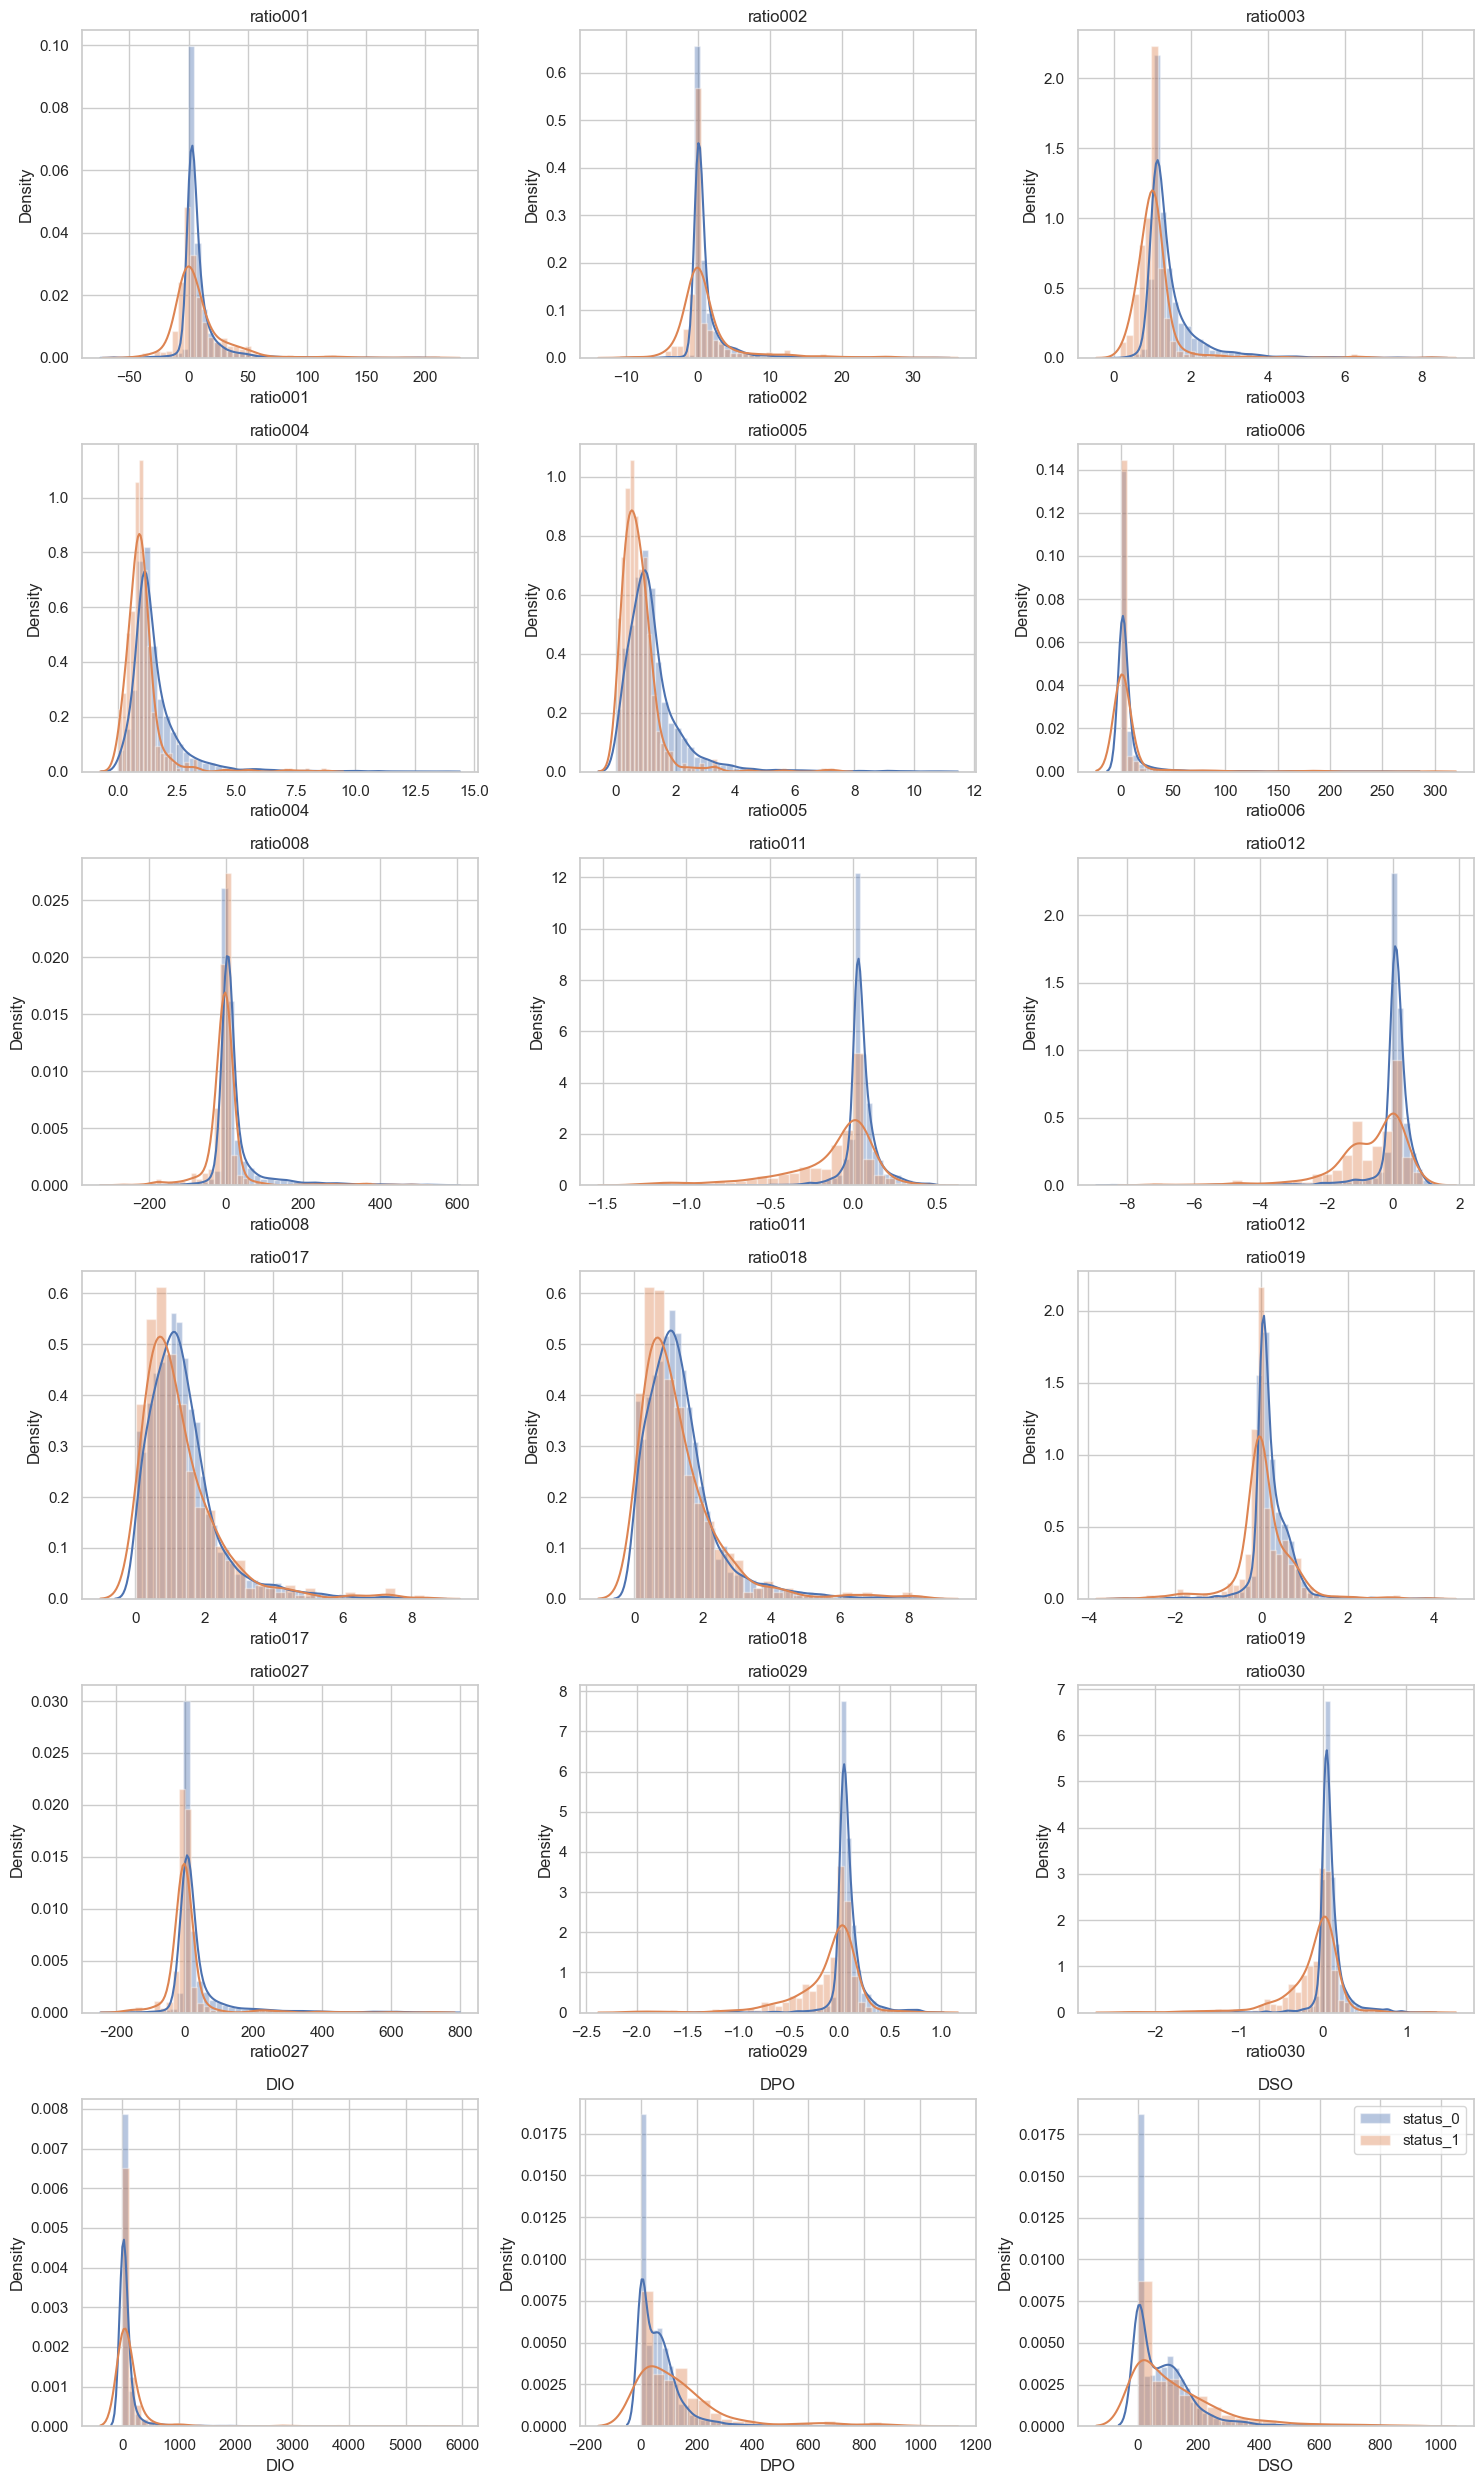

In [18]:
# Crear subconjuntos para cada valor de la columna 'status'
status_0 = df[df['status'] == 0]
status_1 = df[df['status'] == 1]

# Especificar las columnas a graficar
columnas = ['ratio001', 'ratio002', 'ratio003', 'ratio004', 'ratio005', 'ratio006', 'ratio008', 'ratio011', 'ratio012', 'ratio017', 'ratio018', 'ratio019', 'ratio027', 'ratio029', 'ratio030', 'DIO', 'DPO', 'DSO']

# Calcular el número de filas y columnas necesarias
filas = len(columnas)
columnas_por_fila = 3
filas = (filas + columnas_por_fila - 1) // columnas_por_fila

# Crear figura y subplots
fig, axes = plt.subplots(filas, columnas_por_fila, figsize=(15, 25))

# Iterar sobre las columnas y generar gráficos de distribución
for i, columna in enumerate(columnas):
    # Calcular el índice de fila y columna
    fila = i // columnas_por_fila
    columna_en_fila = i % columnas_por_fila
    
    # Generar histogramas para cada valor de la columna 'status'
    sns.distplot(status_0[columna], ax=axes[fila, columna_en_fila], label='status_0', kde=True)
    sns.distplot(status_1[columna], ax=axes[fila, columna_en_fila], label='status_1', kde=True)
    
    # Configurar las etiquetas y el título del gráfico
    
    axes[fila, columna_en_fila].set_ylabel("Density")
    axes[fila, columna_en_fila].set_title(columna)

# Ajustar el espaciado y mostrar el gráfico
fig.tight_layout()
plt.legend()
plt.show()

Mediante un test de medias podemos definir si existe una diferencia estadística entre las medias de los datos correspondientes a cada clase para cada ratio. El p-valor que resultante de cada test indica si la diferencia entre medias de cada clase es estadísticamente significativa o no. A partir de un p-valor menor a 0.05 se considera a la diferencia estadisticamente significativa. 

In [19]:
from scipy.stats import ttest_ind
significant_columns = []

for column in df.columns:
    if column not in ["status", 'ratio036', 'ratio037', 'ratio039', 'ratio040']: 
        group1 = df[df["status"] == 0][column]  # Datos del grupo 1
        group2 = df[df["status"] == 1][column]  # Datos del grupo 2
        t_statistic, p_value = ttest_ind(group1, group2)  # Test de medias
        print("Column:", column)
        print("t-statistic:", t_statistic)
        print("p-value:", p_value)
        if p_value < 0.05:  # Destacar si p-value < 0.05 
            significant_columns.append(column)
            
# Imprimir las columnas con p-value > 2 
if len(significant_columns) > 0:
    print("Las siguientes columnas tienen p-value < 0.05:")
    print(significant_columns)
else:
    print("No hay columnas con p-value > 0.05.")

Column: ratio001
t-statistic: -0.32576183666793895
p-value: 0.7446196611717327
Column: ratio002
t-statistic: -0.8865405111976671
p-value: 0.37537358286016675
Column: ratio003
t-statistic: 11.24531119069266
p-value: 5.909472517394636e-29
Column: ratio004
t-statistic: 9.837247422679134
p-value: 1.3115930428610947e-22
Column: ratio005
t-statistic: 10.114213047661966
p-value: 8.554673903708655e-24
Column: ratio006
t-statistic: 0.5691066166753391
p-value: 0.5693121158104688
Column: ratio008
t-statistic: 8.621579189873856
p-value: 9.01209335999468e-18
Column: ratio011
t-statistic: 28.24272048294878
p-value: 9.853589859819743e-162
Column: ratio012
t-statistic: 19.511008330871665
p-value: 1.8503934578632262e-81
Column: ratio017
t-statistic: 1.5538431206431353
p-value: 0.12029197684230977
Column: ratio018
t-statistic: 1.0720376783942518
p-value: 0.2837604448189104
Column: ratio019
t-statistic: 6.852484422975103
p-value: 8.236196433989648e-12
Column: ratio027
t-statistic: 7.574867949610397
p-val

In [20]:
# Vemos la media de las variables resultantes

medias = ['ratio003', 'ratio004', 'ratio005', 'ratio008', 'ratio011', 'ratio012', 'ratio019', 'ratio027', 'ratio029', 'ratio030', 'DIO', 'DPO', 'DSO']
media_clasif = df.groupby('status')[medias].mean()
print(media_clasif)

        ratio003  ratio004  ratio005   ratio008  ratio011  ratio012  ratio019  \
status                                                                          
0       1.487742  1.597079  1.243633  26.217702  0.047816  0.008752  0.211768   
1       1.086767  1.041546  0.757088  -2.334116 -0.133996 -0.694699  0.050361   

         ratio027  ratio029  ratio030         DIO         DPO         DSO  
status                                                                     
0       40.178063  0.084345  0.091696  100.609313   66.687998   89.090388  
1        6.955663 -0.118976 -0.119036  142.471888  140.339357  128.646586  


A partir de los gráficos de las distribuciones y del resultado del test de medias podemos llegar a las siguientes conclusiones (recordando que 1 indica default):

* ratio003: en promedio el ratio de solvencia (AT/PT) es mayor para la clase 0 (1.48) que para la clase 1 (1.08). Un menor valor de este ratio implica una menor solvencia.

* ratio004: en promedio el ratio de liquidez (AC/PC) es mayor para la clase 0 (1.59) que para la clase 1 (1.04). Un menor valor de este ratio implica una menor liquidez.

* ratio005: en promedio el ratio de liquidez extremo (AC - STOCKS/PC) es mayor para la clase 0 (1.24) que para la clase 1 (0.75). Un menor valor de este ratio implica una menor liquidez extrema.

* ratio008: en promedio el ratio (EBIT/Int. pagados) es mayor para la clase 0 (26.2) que para la clase 1 (-2.3). Un menor valor de este ratio implica una menor ganancia antes de intereses e impuestos en relación a los intereses, y un valor menor que cero implica EBIT negativo, es decir, pérdida.

* ratio011: en promedio el ratio de peso de la carga impositiva (P/L + Int. pagados/AT) es mayor para la clase 0 (0.04) que para la clase 1 (-0.13). Un menor valor de este ratio implica menor rendimiento del activo total antes de impuestos, y un valor menor que cero implica rendimiento negativo del activo total antes de impuestos.

* ratio012: en promedio el ratio de rentabilidad de los accionistas despues de impuestos (P/L despues de imp/Capital propio) es mayor para la clase 0 (0.008) que para la clase 1 (-0.69). Un menor valor de este ratio implica una menor rentabilidad para los accionistas luego de impuestos, y un valor menor que cero implica rentabilidad negativa despues de impuestos para los accionistas.

* ratio019: en promedio el ratio de peso de la carga financiera sobre el resultado antes de impuestos (Int pagados/ P/L + Int pagados) es mayor para la clase 0 (0.21) que para la clase 1 (0.05). Un menor valor de este ratio implica una menor carga financiera (intereses) sobre el resultado antes de impuestos. Es esperable que el valor del ratio sea menor en empresas en default ya que la carga financiera baja al no cumplir con la totalidad de sus obligaciones.

* ratio027: en promedio el ratio (EBITDA/Int. pagados) es mayor para la clase 0 (40.17) que para la clase 1 (6.9). Un menor valor de este ratio implica una menor ganancia antes de intereses, impuestos, amortizacion y depreciaciones en relación a los intereses pagados. 

* ratio029: en promedio el ratio (EBITDA/Resultado operativo) es mayor para la clase 0 (0.08) que para la clase 1 (-0.11). Un menor valor de este ratio implica una menor ganancia antes de intereses, impuestos, amortizacion y depreciaciones en relación al resultado operativo, y un valor menor que cero implica un EBITDA negativo promedio, es decir, pérdida promedio.

* ratio030: en promedio el ratio (EBITDA/Ventas) es mayor para la clase 0 (0.09) que para la clase 1 (-0.11). Un menor valor de este ratio implica una menor ganancia antes de intereses, impuestos, amortizacion y depreciaciones en relación a las ventas, y un valor menor que cero implica un EBITDA negativo promedio, es decir, pérdida promedio.

* DIO: en promedio el ratio (Inventario/Resultado operaetivo) es menor para la clase 0 (100.6) que para la clase 1 (142.4). Un menor valor de este ratio implica un menor valor de inventario en relación con el resultado operativo, lo que implica mayor rotación de mercadería.

* DPO: en promedio el ratio (Acreedores/Resultado operativo) es menor para la clase 0 (66.4) que para la clase 1 (140.2). Un menor valor de este ratio implica menor acreencias por parte de la empresa en relación al resultado operativo.

* DSO: en promedio el ratio (Cuentas por cobrar/Resultado operativo) es menor para la clase 0 (89.09) que para la clase 1 (128.6). Un menor valor de este ratio implica menor dedudores por parte de la empresa en relación al resultado operativo

**Todas las diferencias de medias evidenciadas se corresponden con lo esperado por la teoria económica**

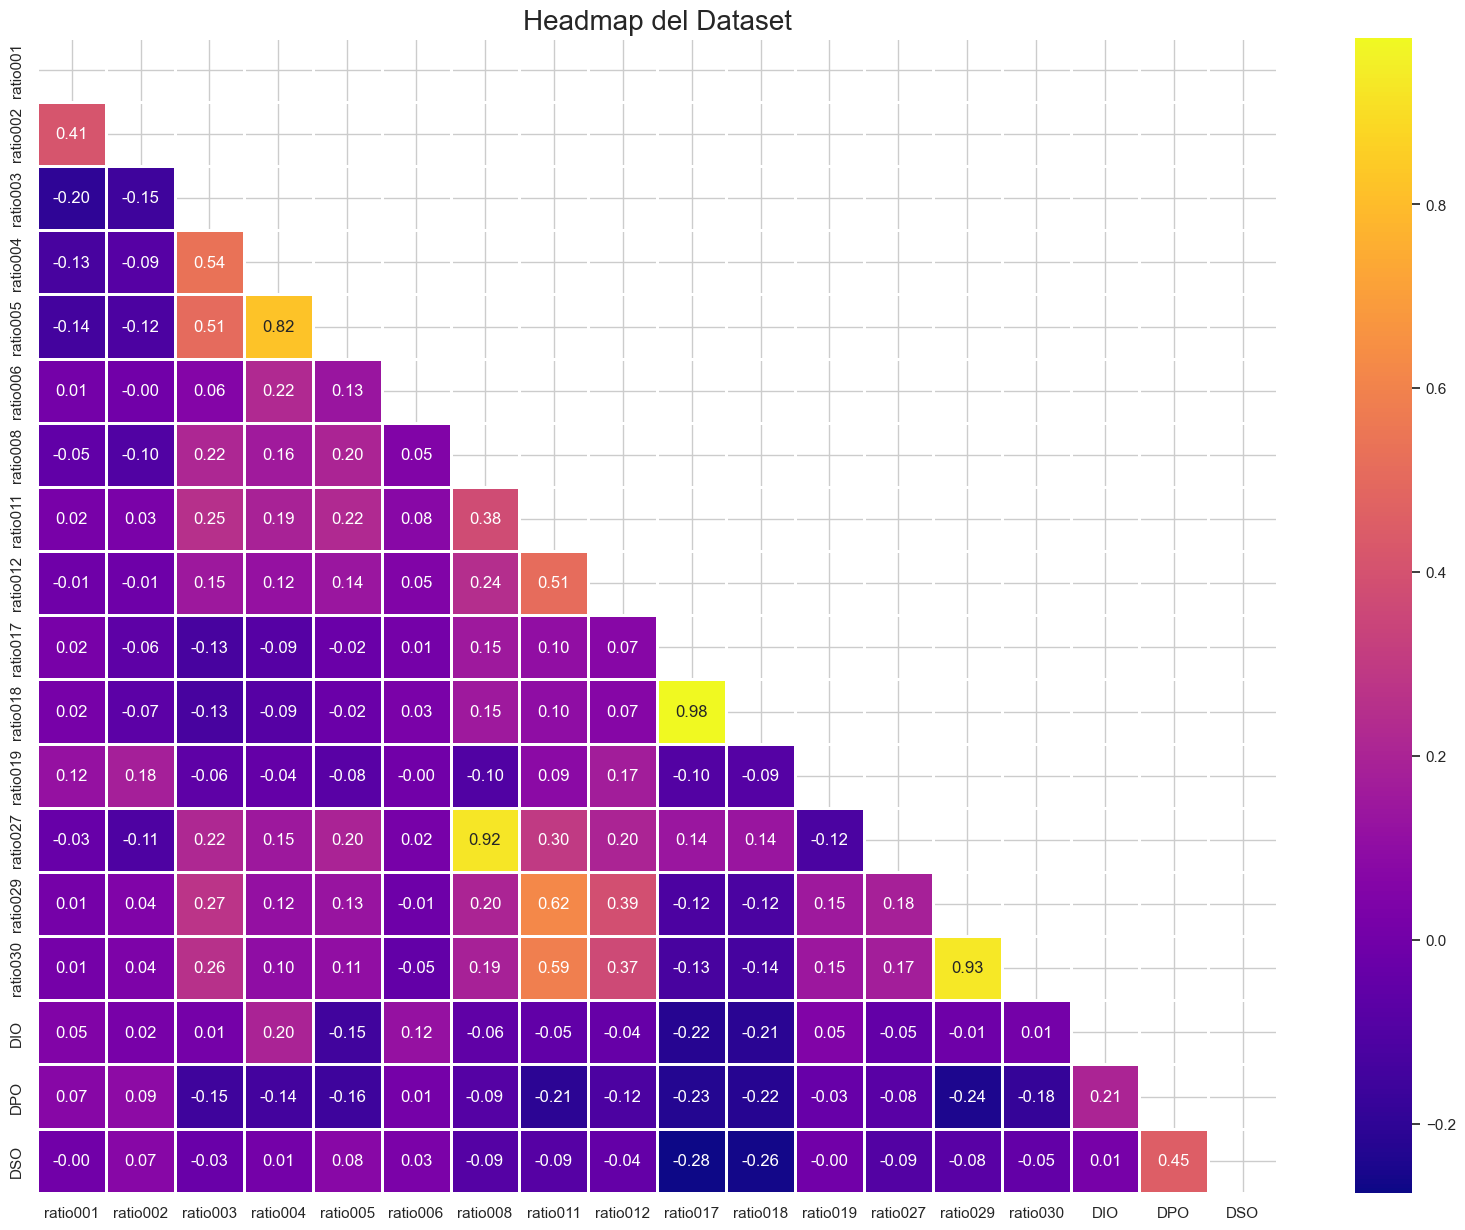

In [21]:
# Analizamos correlación en las variables numéricas del DataSet

plt.rcParams['figure.figsize'] = (20,15)
mask = np.triu(np.ones_like(var_cont.corr(), dtype=bool))
sns.heatmap(var_cont.corr(), mask=mask, fmt=".2f", annot=True, lw=1, cmap='plasma')
plt.title('Headmap del Dataset', fontsize=20)
plt.show()

Podemos notar 4 casos en los que el coeficiente de correlación es mayor a 0.8:

* ratio005 y ratio004
* ratio008 y ratio027
* ratio017 y ratio018
* ratio029 y ratio030

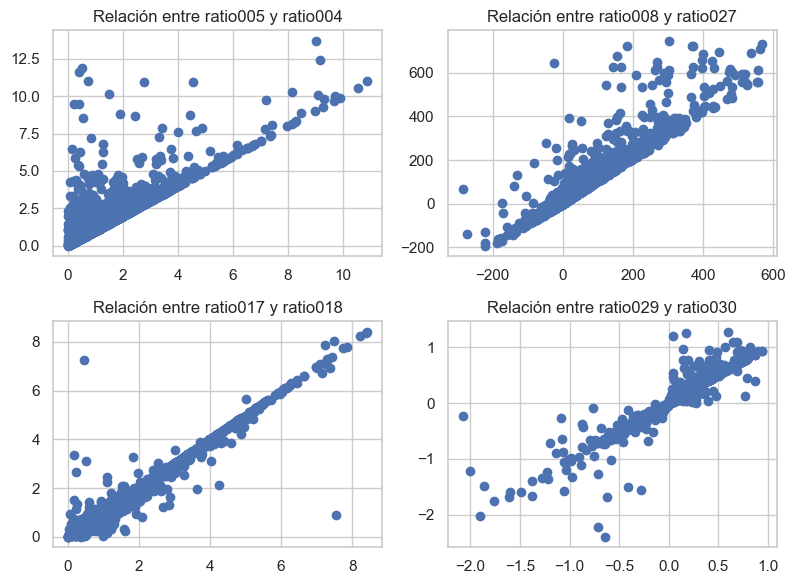

In [22]:
corr_pairs = [('ratio005', 'ratio004'), ('ratio008', 'ratio027'), ('ratio017', 'ratio018'), ('ratio029', 'ratio030')]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# Iterar sobre las parejas de variables y graficar el scatterplot en cada subplot
for i, pair in enumerate(corr_pairs):
    row, col = i // 2, i % 2
    x_name, y_name = pair
    axs[row, col].scatter(df[x_name], df[y_name])
    axs[row, col].set_title(f"Relación entre {x_name} y {y_name}")
plt.tight_layout()
plt.show()

Analizando las variables involucradas en los gráficos podemos notar que la correlación casi perfecta viene dada debido a la construcción de cada ratio. Es decir, en todos los casos las variables comparten numerador o denominador, lo cual genera esta relación lineal.

**Conclusiones EDA**

* La proporción de empresas en "Default" es del 11% mientras que el restante 89% se encuentran en "No default". Podemos concluir que el dataset es debalanceado entre clases.

* Del análisis de distribución y test de medias de las variables numéricas del dataset discriminados según status de default o no y se obtuvieron 13 variables cuyas diferencias de medias entre clase son estadísticamente distinta de cero.

* La solvencia de las empresas en "No default" es un 37% mayor en promedio a aquellas en "Default". 

* La liquidez de las empresas en "No default" es un 57% mayor en promedio a aquellas en "Default".

* Las empresas en "Default" se apoyan en sus acreedores para generar su resultado operativo en un 110% mas en promedio que aquellas empresas en "No default".

* Las empresas en "Default" tienen un 44% mas en promedio de ventas a crédito que aquellas empresas en "No default".

* No existen correlaciones relevantes para analizar.


# Sección 4 - PREPARACIÓN DE DATOS

In [23]:
# Definición target y features
y = df['status']
X = df.drop('status', axis=1)

# Separación de base de datos en datos de entrenamiento+validación y datos de testeo.
X_trainv, X_test, y_trainv, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)

# Separación de base de datos en datos de entrenamiento puro y datos de validación.
X_train, X_valid, y_train, y_valid = train_test_split(X_trainv, y_trainv, train_size=0.7, random_state=0, stratify=y_trainv)

# Se incluye el parametro stratify=y y stratify=y_trainv en ambos splits para garantizar que las proporciones de la variable objetivo (y) se mantengan constantes

In [24]:
# Escalado con MinMaxScaler

# LLamamos a la clase y la instanciamos
scaler = MinMaxScaler()

# ajustamos la clase a los datos de entrenamiento (calcula el minimo y el rango de c/feature para luego transformar los datos)
scaler.fit(X_train)

# Transformamos los datos 

# Transformacion datos de entrenamiento
X_train_scaled = scaler.transform(X_train)

# Transformacion datos de validación
X_valid_scaled = scaler.transform(X_valid)

# Transformacion datos de testeo
X_test_scaled = scaler.transform(X_test)

#Compruebo que no se haya alterado el tamaño de los datos
print(X_train.shape)
print(X_train_scaled.shape)
print(X_valid.shape)
print(X_valid_scaled.shape)
print(X_test.shape)
print(X_test_scaled.shape)

(2211, 18)
(2211, 18)
(948, 18)
(948, 18)
(1355, 18)
(1355, 18)


In [25]:
# Los dataset con el que se entrenarán, validarán y evaluarán los modelos son los siguientes
print(X_train_scaled[:2])
print(X_valid_scaled[:2])
print(X_test_scaled[:2])

# Notamos que todos los valores en los numpyarray se encuentran entre 0 y 1.

[[2.45767724e-01 2.22998138e-01 1.51851852e-01 1.12165660e-01
  7.27272727e-02 1.36675094e-02 2.94763086e-01 7.32558140e-01
  9.03157895e-01 1.38853503e-01 1.34961440e-01 4.80905233e-01
  1.98552449e-01 6.25514403e-01 5.78767123e-01 2.93620617e-02
  2.47546347e-01 1.21875000e-01]
 [2.40777704e-01 2.32774674e-01 2.09876543e-01 1.27696290e-01
  1.48484848e-01 5.34974900e-03 3.39728663e-01 9.01162791e-01
  9.54736842e-01 1.59235669e-01 1.59383033e-01 4.69589816e-01
  2.44336976e-01 7.36625514e-01 6.74657534e-01 6.33713561e-04
  3.59869138e-02 8.64583333e-02]]
[[0.25079471 0.22835196 0.1345679  0.10353753 0.02727273 0.00806127
  0.28010783 0.71511628 0.89473684 0.20254777 0.20179949 0.39179632
  0.1998297  0.62139918 0.57534247 0.03274187 0.11777535 0.00833333]
 [0.24447401 0.2325419  0.15925926 0.37877481 0.31818182 0.0134843
  0.29510479 0.76744186 0.91052632 0.12356688 0.12467866 0.48090523
  0.2037597  0.67901235 0.62328767 0.01753274 0.02399128 0.11875   ]]
[[2.50092408e-01 2.22998138

# Sección 5 - ESTIMACION DE MODELOS

Antes de entrenar los algoritmos y obtener los modelos es importante destacar que el inconveniente que presenta la base de datos con respecto al desbalance de clases puede afectar al rendimiento de los modelos mediante un bajo recall debido a una cantidad relativamente grande de falsos negativos. En el problema particular de este trabajo es muy importante obtener modelos con la menor proporción de falsos negativos posible, ya que es muy costoso para los prestatarios de plataformas P2P otorgar prestamos que son luego defaulteados. En este sentido cada falso negativo "es mas costoso" que un falso positivo (oportunidad de prestamo perdida). Debido al desbalance de clases surgen dos cuestiones:

1 - Los algoritmos pueden no obtener suficientes datos de la clase minoritaria y por lo tanto resultarles dificil aprender a identificar a dicha clase (en este caso la clase positiva ó 1)

2 - El accuracy del modelo puede no ser una métrica conveniente de utilizar al momento de decidirse entre modelos ya que cuando existen clases desbalanceadas puede haber un accuracy "bueno" (mayor al 90%) y el algoritmo no ser capaz de identificar ningun dato de la clase minoritaria. Es más, si al optimizar los hiperparámetros se indica al accuracy como métrica a maximizar el resultado "óptimo" en este caso podría ser un algoritmo cuyas predicciones sean siempre la clase mayoritaria (0 en nuestro caso), ya que el castigo que recibiria el accuracy por los falsos negativos sería muy bajo en relación con el "premio" de identificar todos los valores de la clase mayoritaria. 

En base a lo anterior expuesto se decide optimizar los hiperparametros de los algoritmos a entrenar con métricas distintas al simple accuracy. En particular, se utilizará el "balanced accuracy" (el cual tiene en cuenta el desbalance de clase) y el área bajo la curva ROC. Además, al evaluar los algoritmos no se utilizará el accuracy como metrica de decisión del algoritmo, sino que será la curva ROC la que lo determinará debido a que nos muestra para distintos umbrales y funciones de decisión el máximo recall posible para una tasa de falsos positivos. 

## Algoritmo 1: Regresión Logistica

In [26]:
# Vamos a probar 2 posibles versiones de modelos de Regresión Logística y evaluarlos entre ellos para elegir el mejor.

logModel1 = LogisticRegression()
logModel2 = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [5000, 1000],
    'class_weight' : ['balanced']
    }
]

# MODELO 1: PARAMETROS OPTIMIZADOS MEDIANTE RANDOMIZED SEARCH CV QUE MAXIMIZAN "BALANCED ACCURACY"
kfolds = StratifiedKFold(5)
clsf1 = RandomizedSearchCV(logModel1, param_grid, cv = kfolds, scoring = "balanced_accuracy", verbose=True, n_jobs=-1, random_state = 42)
clf1 = clsf1.fit(X_train_scaled,y_train)
predic1 = clf1.predict(X_valid_scaled)

# MODELO 2: PARAMETROS OPTIMIZADOS MEDIANTE RANDOMIZED SEARCH CV QUE MAXIMIZAN "AREA BAJO LA CURVA ROC"
kfolds = StratifiedKFold(5)
clsf2 = RandomizedSearchCV(logModel2, param_grid, cv = kfolds, scoring = "roc_auc", verbose=True, n_jobs=-1, random_state = 0)
clf2 = clsf2.fit(X_train_scaled,y_train)
predic2 = clf2.predict(X_valid_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [27]:
# Valores óptimos de parámetros modelo 1
print("Mejores parametros", clf1.best_params_)
print("Mejor score de CV", clf1.best_score_)

# Valores óptimos de parámetros modelo 2
print("Mejores parametros", clf2.best_params_)
print("Mejor score de CV", clf2.best_score_)

Mejores parametros {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': 'balanced', 'C': 0.00026366508987303583}
Mejor score de CV 0.7244708974572897
Mejores parametros {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'class_weight': 'balanced', 'C': 0.615848211066026}
Mejor score de CV 0.7647462363873748


### Regresión Logística: Análisis de métricas

#### Matriz de confusión

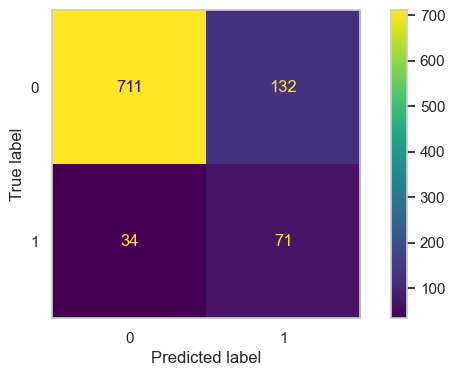

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       843
           1       0.35      0.68      0.46       105

    accuracy                           0.82       948
   macro avg       0.65      0.76      0.68       948
weighted avg       0.89      0.82      0.85       948



0.5840027114048466

In [28]:
plt.rcParams['figure.figsize'] = (8,4)

# MODELO 1
# Matriz de confusión
cm = confusion_matrix(y_valid, predic1, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf1.classes_)
disp.plot()
plt.grid(False)
plt.show()

#Metricas del modelo
print(metrics.classification_report(y_valid, predic1))
clf1.score(X_valid, y_valid)

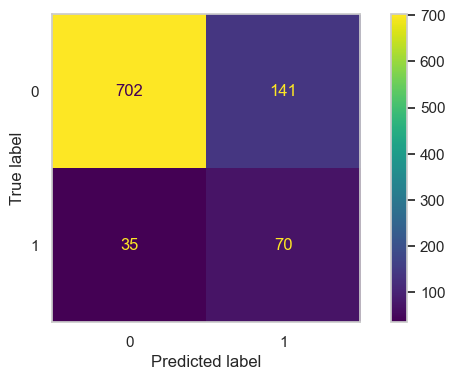

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       843
           1       0.33      0.67      0.44       105

    accuracy                           0.81       948
   macro avg       0.64      0.75      0.67       948
weighted avg       0.88      0.81      0.84       948



0.6447946675704682

In [29]:
plt.rcParams['figure.figsize'] = (8,4)

# MODELO 2
# Matriz de confusión
cm = confusion_matrix(y_valid, predic2, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf2.classes_)
disp.plot()
plt.grid(False)
plt.show()

#Metricas del modelo
print(metrics.classification_report(y_valid, predic2))
clf2.score(X_valid, y_valid)

**ESTO PROBABLEMENTE NO VAYA**

Analizando la matriz de confusión de ambos modelos podemos notar el efecto que tiene el desbalance de clases en la estimación mediante el recall menor al 70% en ambos casos a pesar de definir el parametro class_weight = balanced en ambos casos. Esto sucede debido a que el modelo presenta dificultades para identificar a la clase 1 y por lo tanto la cantidad de falsos negativos es relativamente alta (recall = TP/FN+TP). 

La matriz de confusión del primer modelo nos muestra un mejor desempeño global (accuracy = 82% vs 81%) aunque en los casos de clases desbalanceadas el accuracy puede no ser la mejor métrica a analizar. Sin embargo, tambien es mejor en recall (68% vs 67%) y en la precisión de la clase 1 (35% vs 33%) aunque esta ultima sea baja debido a la cantidad de falsos positivos que son necesarios para poder identificar mayor cantidad de datos de la clase 1.

#### Roc curve (Receiver operating characteristics)

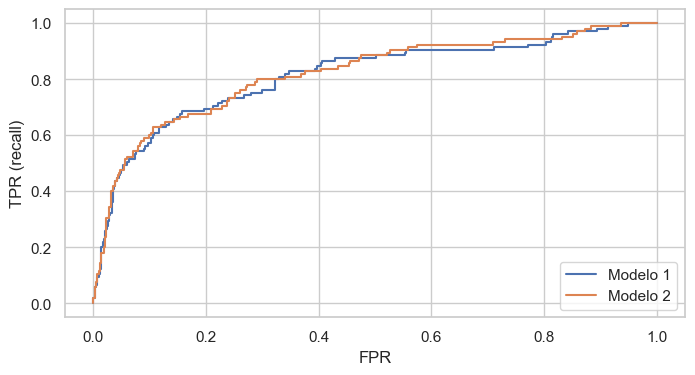

In [30]:
plt.rcParams['figure.figsize'] = (8,4)

# GRAFICO MODELO 1
fpr1, tpr1, thresholds1 = roc_curve(y_valid, clf1.predict_proba(X_valid_scaled)[:,1])
plt.plot(fpr1, tpr1, label= "Modelo 1")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

# GRAFICO MODELO 2
fpr2, tpr2, thresholds2 = roc_curve(y_valid, clf2.predict_proba(X_valid_scaled)[:,1])
plt.plot(fpr2, tpr2, label= "Modelo 2")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

Gráficamente podemos observar que la curva ROC del modelo 2 es mejor, ya que cada valor de recall se corresponde con una menor tasa de falsos positivos.

In [31]:
auc_modelo1 = roc_auc_score(y_valid, clf1.predict_proba(X_valid_scaled)[:, 1])
auc_modelo2 = roc_auc_score(y_valid, clf2.predict_proba(X_valid_scaled)[:, 1])
print("AUC del modelo 1: {:.3f}".format(auc_modelo1))
print("AUC del modelo 2: {:.3f}".format(auc_modelo2))

AUC del modelo 1: 0.814
AUC del modelo 2: 0.820


El valor del área debajo de la curva nos confirma que el modelo 2 tiene un mejor desempeño predictivo que el modelo 1 en base a la métrica que utilizamos para elegir.

## Algoritmo 2: Support Vector Machine

In [32]:
# Al igual que el caso anterior, vamos a probar 2 posibles versiones de modelos de SVM y evaluarlos entre ellos para elegir el mejor.

svcModel1 = SVC()
svcModel2 = SVC()

param_grid2 = [{'kernel': ['rbf'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': ['balanced']},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'class_weight': ['balanced']}]

# MODELO 1: PARAMETROS OPTIMIZADOS MEDIANTE RANDOMIZED SEARCH CV QUE MAXIMIZAN "BALANCED ACCURACY"
kfolds = StratifiedKFold(5)
clff1 = RandomizedSearchCV(svcModel1, param_grid2, cv = kfolds, scoring = "balanced_accuracy",  verbose=True, n_jobs=-1, random_state=0)
best_clf = clff1.fit(X_train_scaled,y_train)
predicc1 = clff1.predict(X_valid_scaled)

# MODELO 2: PARAMETROS OPTIMIZADOS MEDIANTE RANDOMIZED SEARCH CV QUE MAXIMIZAN "AREA BAJO LA CURVA ROC"
kfolds = StratifiedKFold(5)
clff2 = RandomizedSearchCV(svcModel2, param_grid2, cv = kfolds, scoring = "roc_auc",  verbose=True, n_jobs=-1, random_state=0)
best_clf2 = clff2.fit(X_train_scaled,y_train)
predicc2 = clff2.predict(X_valid_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [33]:
# Valores óptimos de parámetros modelo 1
print("Mejores parametros", clff1.best_params_)
print("Mejor score de CV", clff1.best_score_)

# Valores óptimos de parámetros modelo 2
print("Mejores parametros", clff2.best_params_)
print("Mejor score de CV", clff2.best_score_)

Mejores parametros {'kernel': 'rbf', 'gamma': 1, 'class_weight': 'balanced', 'C': 10}
Mejor score de CV 0.718975542613682
Mejores parametros {'kernel': 'rbf', 'gamma': 10, 'class_weight': 'balanced', 'C': 0.01}
Mejor score de CV 0.7722005367419955


### Support Vector Machine: Análisis de métricas

#### Matriz de confusión

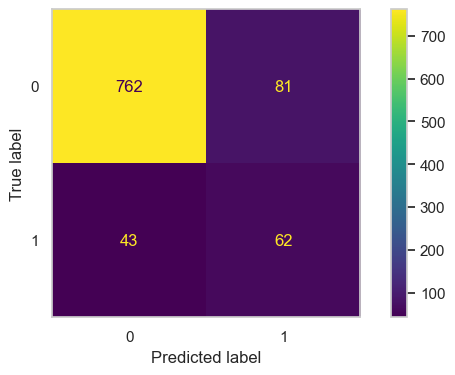

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       843
           1       0.43      0.59      0.50       105

    accuracy                           0.87       948
   macro avg       0.69      0.75      0.71       948
weighted avg       0.89      0.87      0.88       948



0.5

In [34]:
plt.rcParams['figure.figsize'] = (8,4)

# MODELO 1
# Matriz de confusión
cm = confusion_matrix(y_valid, predicc1, labels=clff1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clff1.classes_)
disp.plot()
plt.grid(False)
plt.show()

#Metricas del modelo
print(metrics.classification_report(y_valid, predicc1))
clff1.score(X_valid, y_valid)

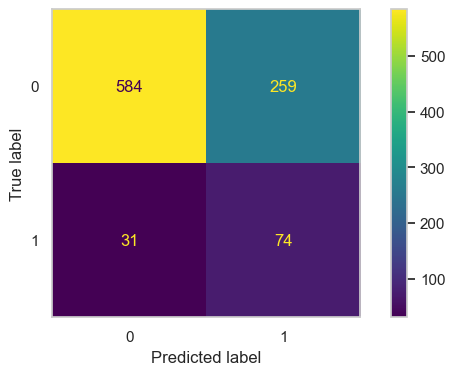

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       843
           1       0.22      0.70      0.34       105

    accuracy                           0.69       948
   macro avg       0.59      0.70      0.57       948
weighted avg       0.87      0.69      0.75       948



0.5

In [35]:
plt.rcParams['figure.figsize'] = (8,4)

# MODELO 2
# Matriz de confusión
cm = confusion_matrix(y_valid, predicc2, labels=clff2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clff2.classes_)
disp.plot()
plt.grid(False)
plt.show()

#Metricas del modelo
print(metrics.classification_report(y_valid, predicc2))
clff2.score(X_valid, y_valid)

#### Roc curve (Receiver operating characteristics)

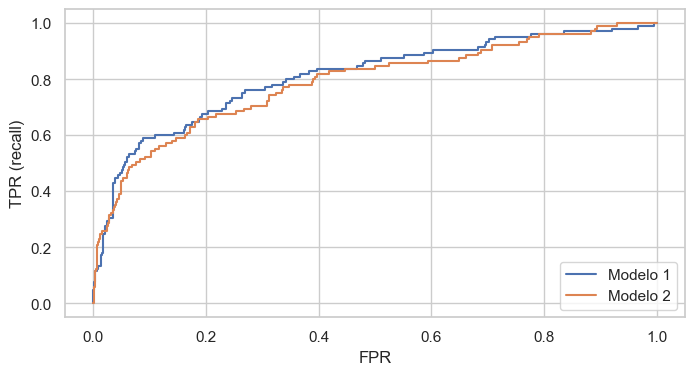

In [36]:
# GRAFICO MODELO 1
fpr1, tpr1, thresholds1 = roc_curve(y_valid, clff1.decision_function(X_valid_scaled))
plt.plot(fpr1, tpr1, label= "Modelo 1")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

# GRAFICO MODELO 2
fpr2, tpr2, thresholds2 = roc_curve(y_valid, clff2.decision_function(X_valid_scaled))
plt.plot(fpr2, tpr2, label= "Modelo 2")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

In [37]:
auc_modelo1 = roc_auc_score(y_valid, clff1.decision_function(X_valid_scaled))
auc_modelo2 = roc_auc_score(y_valid, clff2.decision_function(X_valid_scaled))
print("AUC del modelo 1: {:.3f}".format(auc_modelo1))
print("AUC del modelo 2: {:.3f}".format(auc_modelo2))

AUC del modelo 1: 0.809
AUC del modelo 2: 0.789


Luego, el modelo seleccionado del algoritmo KNN es el modelo 1.

## Algoritmo 3: K- Nearest- Neighbors

In [38]:
# Comenzamos con el tuneo de hiperparametros. En este algoritmo uno de los hiperparametros es la 'k' de cantidad de vecinos cercanos para clasificar
# Como no tenemos un rango conocido para probar con el RandomizedSearchCV iteramos observando el accuracy para distintos valores de k y así definir un rango.

# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled,y_train)
    yhat= knn.predict(X_valid_scaled)
    mean_acc[i-1] = metrics.accuracy_score(y_valid, yhat)

mean_acc

array([0.86919831, 0.89978903, 0.89978903, 0.89662447, 0.89767932,
       0.90189873, 0.89873418, 0.89767932, 0.89873418, 0.90084388,
       0.90295359, 0.90400844, 0.90400844, 0.90400844, 0.90295359,
       0.90400844, 0.90506329, 0.90506329, 0.90506329, 0.90506329])

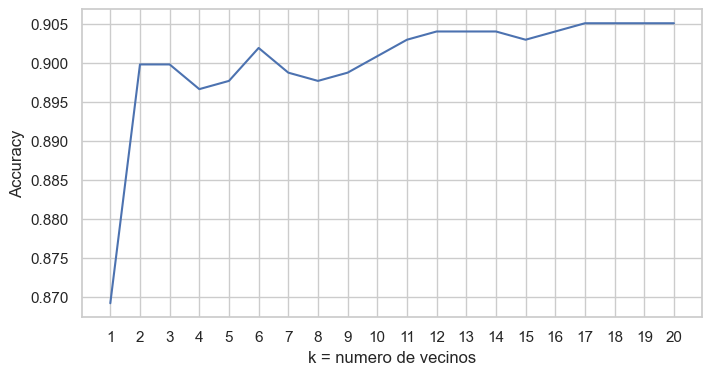

In [39]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (8, 4))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('k = numero de vecinos')
plt.ylabel('Accuracy')
plt.show()

Podemos observar que luego de k = 1 el accuracy del modelo crece y se mantiene en el intervalo (0.895 - 0.905) y a partir de   k = 17 el valor parece mantenerse estable. 

In [40]:
# Comparamos 2 posibles versiones de modelos de KNN y los evaluamos para elegir el mejor.

knnModel1 = KNeighborsClassifier()
knnModel2 = KNeighborsClassifier()


param_grid3 = { 'n_neighbors' : range(2, 18),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


# MODELO 1: PARAMETROS OPTIMIZADOS MEDIANTE RANDOMIZED SEARCH CV QUE MAXIMIZAN "BALANCED ACCURACY"
kfolds = StratifiedKFold(5)
clfff1 = RandomizedSearchCV(knnModel1, param_grid3, cv = kfolds, scoring = "balanced_accuracy",  verbose=True, n_jobs=-1, random_state=0)
best_clf = clfff1.fit(X_train_scaled,y_train)
prediccc1 = clfff1.predict(X_valid_scaled)

# MODELO 2: PARAMETROS OPTIMIZADOS MEDIANTE RANDOMIZED SEARCH CV QUE MAXIMIZAN "AREA BAJO LA CURVA ROC"
kfolds = StratifiedKFold(5)
clfff2 = RandomizedSearchCV(knnModel2, param_grid3, cv = kfolds, scoring = "roc_auc",  verbose=True, n_jobs=-1, random_state=0)
best_clf = clfff2.fit(X_train_scaled,y_train)
prediccc2 = clfff2.predict(X_valid_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [41]:
# Valores óptimos de parámetros modelo 1
print("Mejores parametros", clfff1.best_params_)
print("Mejor score de CV", clfff1.best_score_)

# Valores óptimos de parámetros modelo 2
print("Mejores parametros", clfff2.best_params_)
print("Mejor score de CV", clfff2.best_score_)

Mejores parametros {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}
Mejor score de CV 0.6340794642148719
Mejores parametros {'weights': 'distance', 'n_neighbors': 13, 'metric': 'euclidean'}
Mejor score de CV 0.7465980751873734


### K- Nearest- Neighbors: Análisis de métricas

#### Matriz de confusión

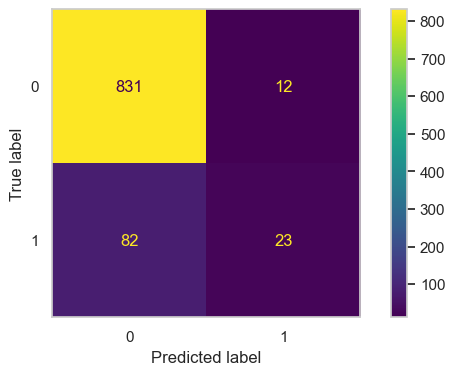

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       843
           1       0.66      0.22      0.33       105

    accuracy                           0.90       948
   macro avg       0.78      0.60      0.64       948
weighted avg       0.88      0.90      0.88       948



0.5268090154211151

In [42]:
plt.rcParams['figure.figsize'] = (8,4)

# MODELO 1
# Matriz de confusión
cm = confusion_matrix(y_valid, prediccc1, labels=clfff1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clfff1.classes_)
disp.plot()
plt.grid(False)
plt.show()

#Metricas del modelo
print(metrics.classification_report(y_valid, prediccc1))
clfff1.score(X_valid, y_valid)

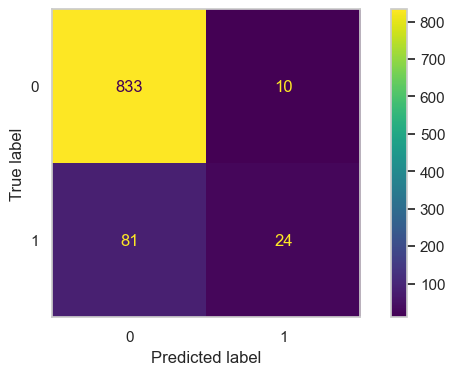

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       843
           1       0.71      0.23      0.35       105

    accuracy                           0.90       948
   macro avg       0.81      0.61      0.65       948
weighted avg       0.89      0.90      0.88       948



0.5491555103654748

In [43]:
plt.rcParams['figure.figsize'] = (8,4)

# MODELO 2
# Matriz de confusión
cm = confusion_matrix(y_valid, prediccc2, labels=clfff2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clfff2.classes_)
disp.plot()
plt.grid(False)
plt.show()

#Metricas del modelo
print(metrics.classification_report(y_valid, prediccc2))
clfff2.score(X_valid, y_valid)

#### Roc curve (Receiver operating characteristics)

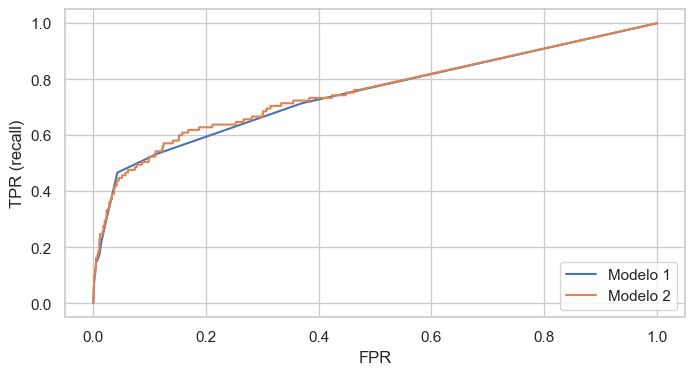

In [44]:
# GRAFICO MODELO 1
fpr1, tpr1, thresholds1 = roc_curve(y_valid, clfff1.predict_proba(X_valid_scaled)[:,1])
plt.plot(fpr1, tpr1, label= "Modelo 1")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

# GRAFICO MODELO 2
fpr2, tpr2, thresholds2 = roc_curve(y_valid, clfff2.predict_proba(X_valid_scaled)[:,1])
plt.plot(fpr2, tpr2, label= "Modelo 2")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

In [45]:
auc_modelo1 = roc_auc_score(y_valid, clfff1.predict_proba(X_valid_scaled)[:,1])
auc_modelo2 = roc_auc_score(y_valid, clfff2.predict_proba(X_valid_scaled)[:,1])
print("AUC del modelo 1: {:.3f}".format(auc_modelo1))
print("AUC del modelo 2: {:.3f}".format(auc_modelo2))

AUC del modelo 1: 0.747
AUC del modelo 2: 0.753


Luego, el modelo seleccionado del algoritmo KNN es el modelo 2.

# Sección 5 - EVALUACION Y ELECCION DE MODELO

En esta sección vamos a evaluar con el set de testeo a los tres algoritmos optimizados en base al set de validación. Utilizaremos distintas métricas para la elección del mejor modelo de clasificación.

In [46]:
# Llevamos a cabo la predicción de los 3 modelos para los datos de testeo

preRL = clf2.predict(X_test_scaled)
preSVM = clff1.predict(X_test_scaled)
preKNN = clfff2.predict(X_test_scaled)

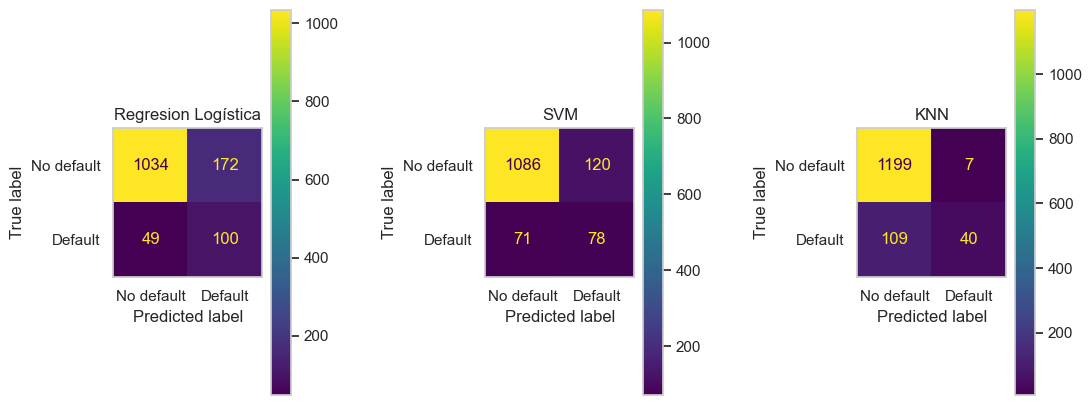

In [47]:
# Matrices de confusión

#Reg. Logística
cmRL = confusion_matrix(y_test, preRL, labels=clf2.classes_)

#SVM
cmSVM = confusion_matrix(y_test, preSVM, labels=clff1.classes_)

#KNN
cmKNN = confusion_matrix(y_test, preKNN, labels=clfff2.classes_)

# Crear la figura y los ejes de subgráfico
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Graficar cada matriz de confusión en un subgráfico diferente
disp1 = ConfusionMatrixDisplay(confusion_matrix=cmRL, display_labels=etiquetas)
disp1.plot(ax=axs[0])
axs[0].set_title('Regresion Logística')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cmSVM, display_labels=etiquetas)
disp2.plot(ax=axs[1])
axs[1].set_title('SVM')

disp3 = ConfusionMatrixDisplay(confusion_matrix=cmKNN, display_labels=etiquetas)
disp3.plot(ax=axs[2])
axs[2].set_title('KNN')

# Agregar una barra de colores para cada subgráfico
for ax in axs:
    ax.grid(False)

# Ajustar los subgráficos
plt.subplots_adjust(wspace=1)

# Mostrar la figura
plt.show()

In [48]:
# Analizamos cuatro métricas para cada modelo: Accuracy, Precision, F1 score, Recall

metricas = pd.DataFrame(index=['Accuracy', 'Precision', 'F1 Score', 'Recall', 'AUC ROC'],
                       columns=['Regresión Logística', 'SVM', 'KNN'])
metricas['Regresión Logística'] = [accuracy_score(y_test, preRL), precision_score(y_test, preRL), f1_score(y_test, preRL), recall_score(y_test, preRL), roc_auc_score(y_test, preRL)]
metricas['SVM'] = [accuracy_score(y_test, preSVM), precision_score(y_test, preSVM), f1_score(y_test, preSVM), recall_score(y_test, preSVM), roc_auc_score(y_test, preSVM)]
metricas['KNN'] = [accuracy_score(y_test, preKNN), precision_score(y_test, preKNN), f1_score(y_test, preKNN), recall_score(y_test, preKNN), roc_auc_score(y_test, preKNN)]
metricas.T

,Accuracy,Precision,F1 Score,Recall,AUC ROC
Regresión Logística,0.836900,0.367647,0.475059,0.671141,0.764260
SVM,0.859041,0.393939,0.449568,0.523490,0.711994
KNN,0.914391,0.851064,0.408163,0.268456,0.631326


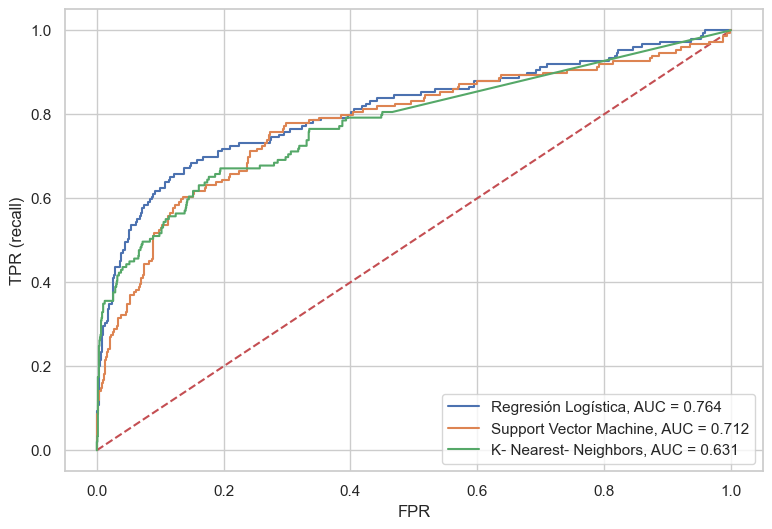

In [49]:
#ROC AUC
fig = plt.figure(figsize=(9,6))
plt.plot([0, 1], [0, 1],'r--')

#Regresión Logística
fpr1, tpr1, thresholds1 = roc_curve(y_test, clf2.predict_proba(X_test_scaled)[:,1])
aucRL = roc_auc_score(y_test, preRL)
plt.plot(fpr1, tpr1, label= f'Regresión Logística, AUC = {str(round(aucRL,3))}')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

#Support Vector Machine
fpr1, tpr1, thresholds1 = roc_curve(y_test, clff1.decision_function(X_test_scaled))
aucSVM = roc_auc_score(y_test, preSVM)
plt.plot(fpr1, tpr1, label= f'Support Vector Machine, AUC = {str(round(aucSVM,3))}')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

#K- Nearest- Neighbors
fpr1, tpr1, thresholds1 = roc_curve(y_test, clfff2.predict_proba(X_test_scaled)[:,1])
aucKNN = roc_auc_score(y_test, preKNN)
plt.plot(fpr1, tpr1, label= f'K- Nearest- Neighbors, AUC = {str(round(aucKNN,3))}')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc = 'lower right')

### Elección de modelo

En base al cuadro de métricas podemos notar rapidamente el trade-off que existe (en nuestro caso con clases desbalanceadas) entre accuracy y recall. En este sentido, si nos guiamos por el valor de accuracy la decisión seria quedarnos con el algoritmo de KNN con un accuracy del 91% y un recall del 26%, lo cual implicaría tener un modelo que predice muy bien a la clase mayoritaria (0) pero gran dificultad para predecir a la minoritaria (1). Como se mencionó antes, en el negocio analizado el costo de cada uno de los falsos negativos es mayor que el de los falsos positivos por lo que lo óptimo para el caso es prestar mayor atencion al recall.
 
Del resto de algoritmos, vemos que el algoritmo de Regresión Logística es el que mayor recall presenta (67%) mientras que el accuracy del modelo cae al 83% y la precision es del 36%. Al observar las dos métricas que tienen en cuenta los distintos trafe-offs a los que hay que enfrentarnos: f1-score(precision-recall) y AUC ROC (recall-falsos positivos), notamos que los mayores valores los alcanza para el algoritmo de Regresión Logística (47% y 67% respectivamente).